In [248]:
import datetime
import numpy as np
import pandas as pd
from pandas import Series
from itertools import groupby
import matplotlib.pyplot as plt

%matplotlib inline  

In [249]:
df = pd.read_csv('data/train.csv')

In [250]:
ids = df['KPI ID'].unique()

In [218]:
df = df[df['KPI ID'] == ids[6]]
#df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
#df = df.set_index('datetime')

In [246]:
df.head()

,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f


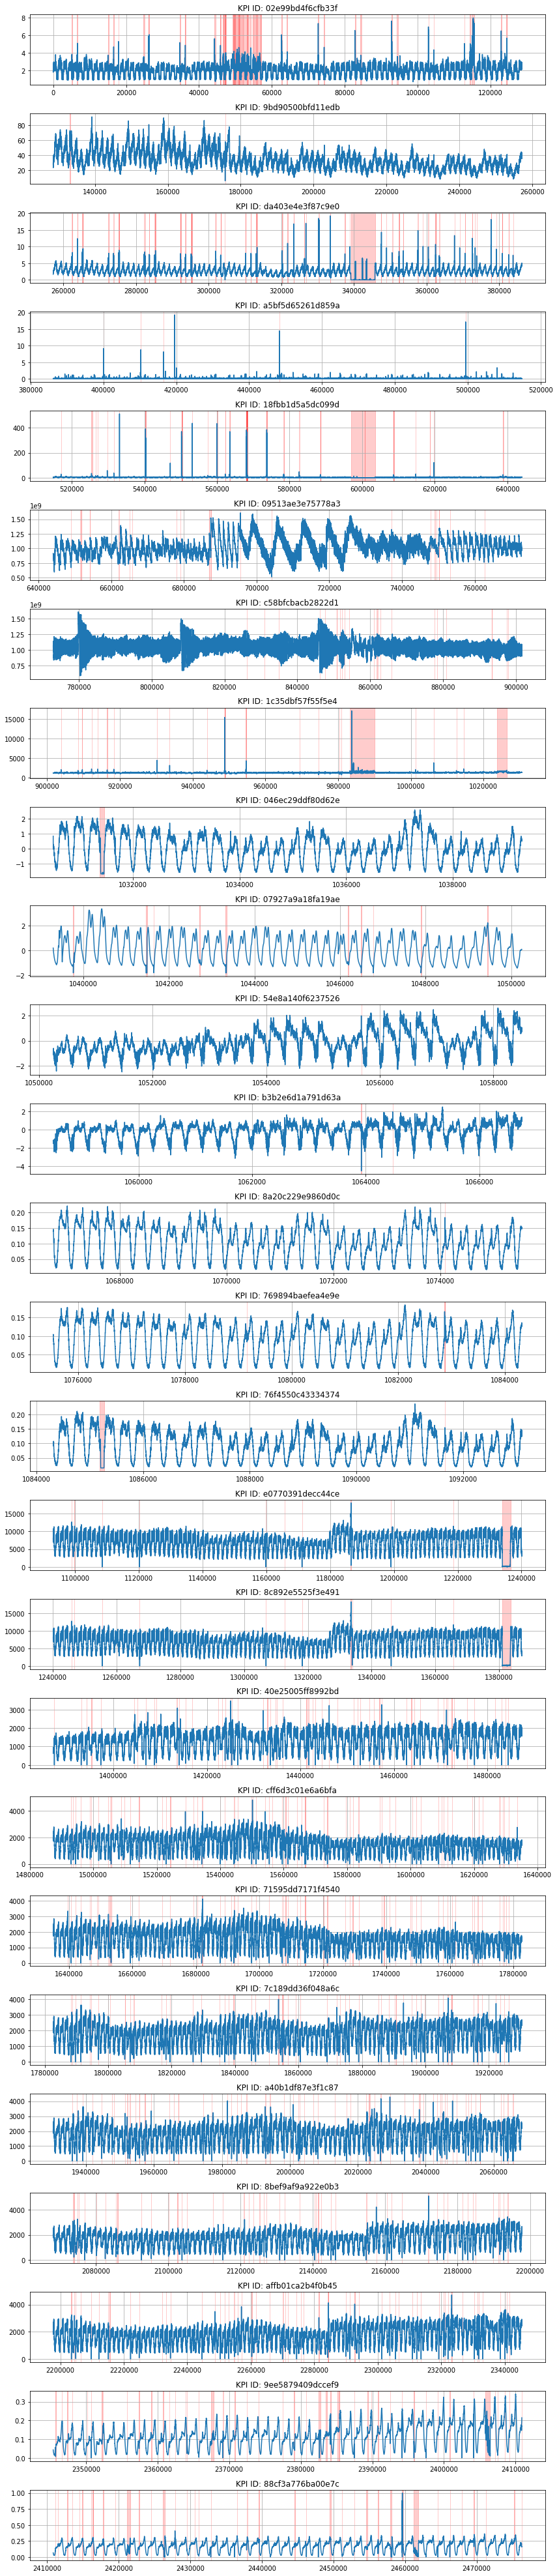

In [341]:
fig, axes = plt.subplots(len(ids), 1, figsize=(12, 55))

for i, _id in enumerate(ids):
    ranges = []
    df_tmp = df[df['KPI ID'] == _id]
    ind = prev = 0
    for k, v in groupby(df_tmp['label'], key=lambda x: x == 1):
        ind += sum(1 for _ in v)
        if k and prev + 1 != ind:
            ranges.append( (prev, ind -1 ) )
        prev = ind
        
    
    axes[i].plot(df_tmp.index, df_tmp['value'])

    for start, end in ranges:
        start = df_tmp.iloc[[start]].index[0]
        end = df_tmp.iloc[[end]].index[0]
        axes[i].axvspan(start, end, color='red', alpha=0.2)
        
    axes[i].set_title('KPI ID: ' + _id)
    axes[i].grid(True)

plt.tight_layout()
#plt.savefig('kpis.pdf')
plt.show()